In [ ]:
! git clone https://github.com/HgThinker/Diabetes_Detection-with-machine-learning.git

fatal: destination path 'Diabetes_Detection-with-machine-learning' already exists and is not an empty directory.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import os,shutil
# shutil.rmtree("Diabetes_Detection-with-machine-learning")

#1. Import


In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import opendatasets as od
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Checking dataset

In [ ]:
df = pd.read_csv('/content/Diabetes_Detection-with-machine-learning/dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
print(df.shape)

(70692, 22)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

# 2. Dataset detail



## 2.1 Dataset description

Diabetes_012: Mức độ tiểu đường (0: Không có, 1: Tiểu đường nhẹ, 2: Tiểu Đường nặng)

HighBP: Huyết áp cao (0: không cao, 1: cao)

HighChol: Cholesterol cao (0: không cao, 1: cao)

CholCheck: Kiểm tra Cholesterol 5 năm 1 lần (0: không, 1:có)

BMI: Chỉ khối cơ thể :Trọng lượng/Chiều cao^2

Smoker: Hút ít nhất 100 điếu thuốc cả đời (0: không, 1:có)

Stroke: Từng đột quỵ (0: không, 1:có)

HeartDiseaseorAttack: Bệnh tim mạch vành hoặc nhồi máu cơ tim (0: không, 1:có)

PhysicActivity: Hoạt động thể chất trong vòng 30 ngày qua ()(Không tính làm việc) (0: không, 1:có)

Fruits: Ăn trái cây ít nhất 1 lần trong ngày (0: không, 1:có)

Veggies: Ăn rau ít nhất 1 lần trong ngày (0: không, 1:có)

HvyAlcoholConsump: Tiêu thụ nhiều đồ uống có cồn (nam >14 lần/tuần, nữ >7 lần/tuần) (0: không, 1:có)

AnyHealthcare: có bảo hiểm sức khỏe (0: không, 1:có)

NoDocbcCost: Trong vòng 12 tháng, phải đến bác sĩ như không đủ tiền (0: không, 1:có)

GenHlth: Tự đánh giá sức khỏe bản thân theo thang 1-5

MentHlth: Số ngày bị vấn đề về tinh thần theo thang 1 - 30

PhysHlth: Số ngày bị vấn đề về thể chất theo thang 1 - 30

DiffWalk: Gặp vấn đề khi đi bộ/ leo cầu thang (0: không, 1:có)

Sex : Giới tính (0: Nữ, 1:Nam)

Age : Khung độ tuổi

Education: Trình độ học vấn

Income: Khung thu nhập


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


## 2.2 Checking dataset unique values


In [ ]:
#checking unique values in different variables
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


## 2.3 Checking and remove duplicates rows

In [ ]:
# Checking duplicates rows in dataset to eliminate them
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  1635


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
891,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
1092,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
1326,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0


In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(69057, 22)

## 2.4 Visualizing dataset


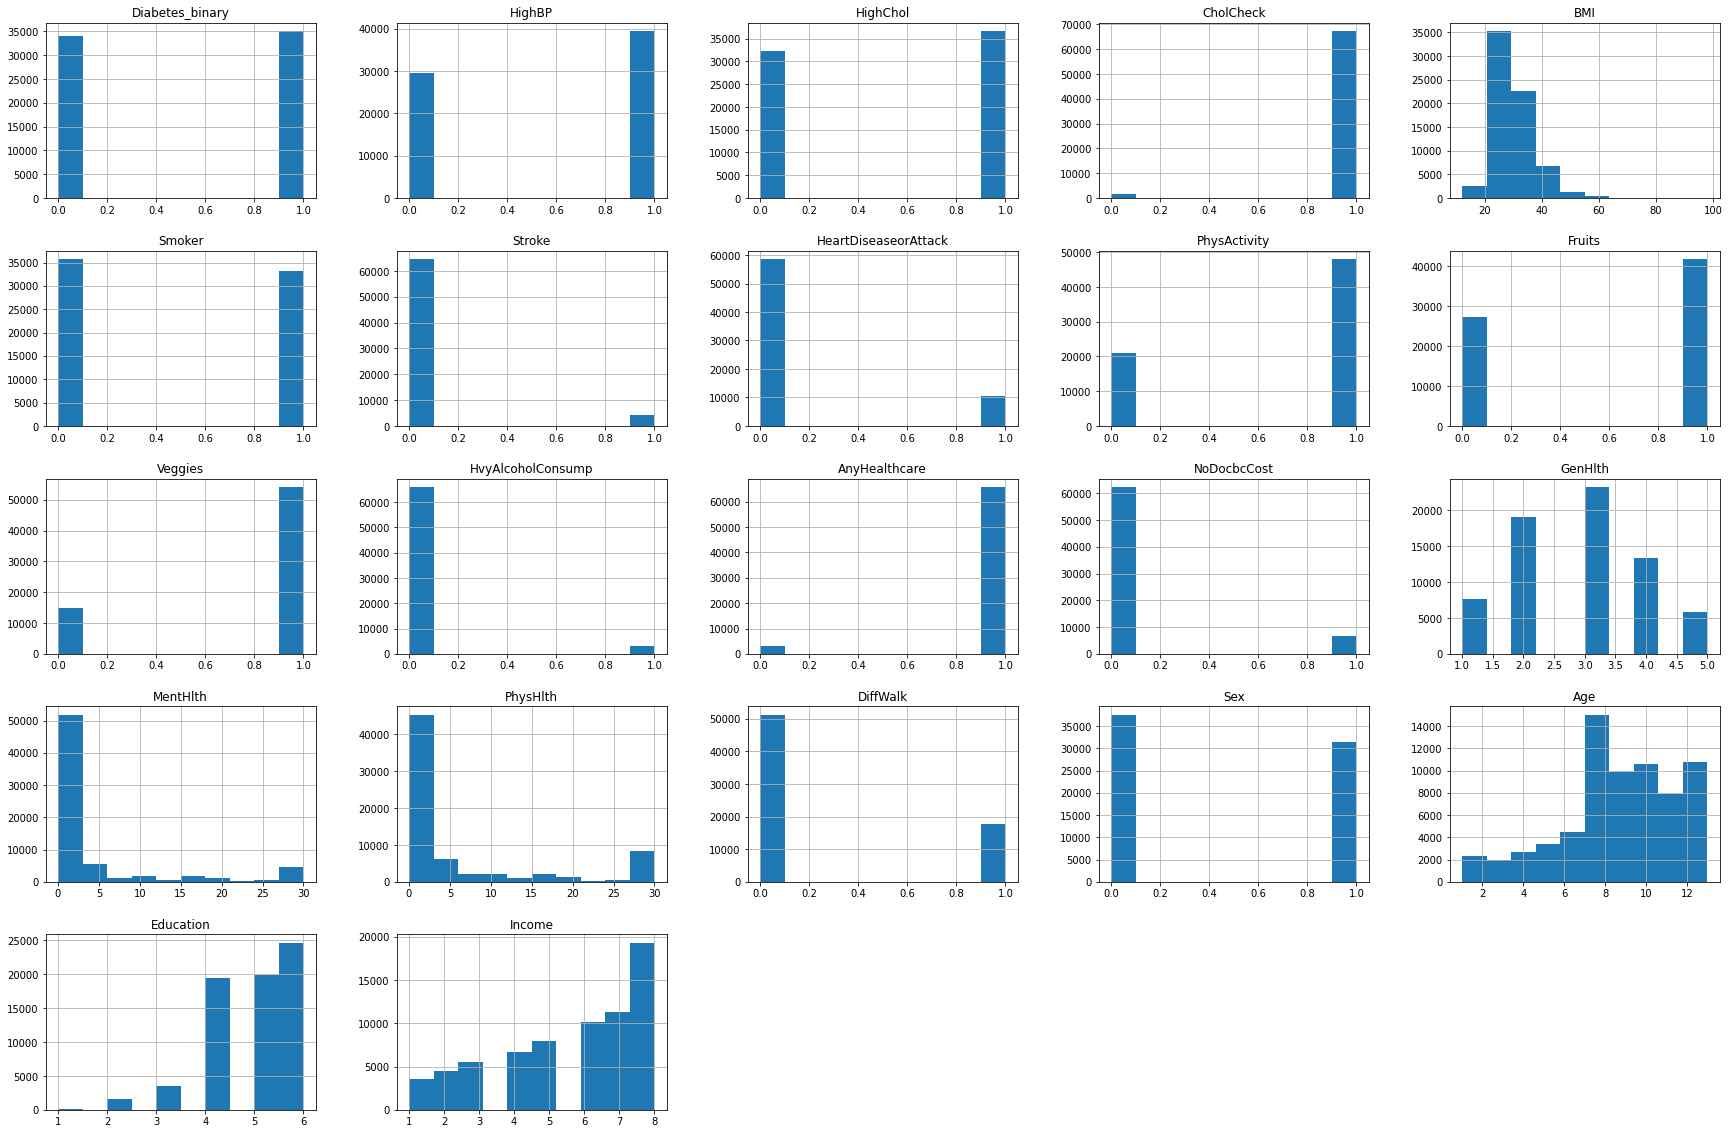

In [ ]:
#using histogram to understand dataset df1 better
df.hist(figsize=(30,20));

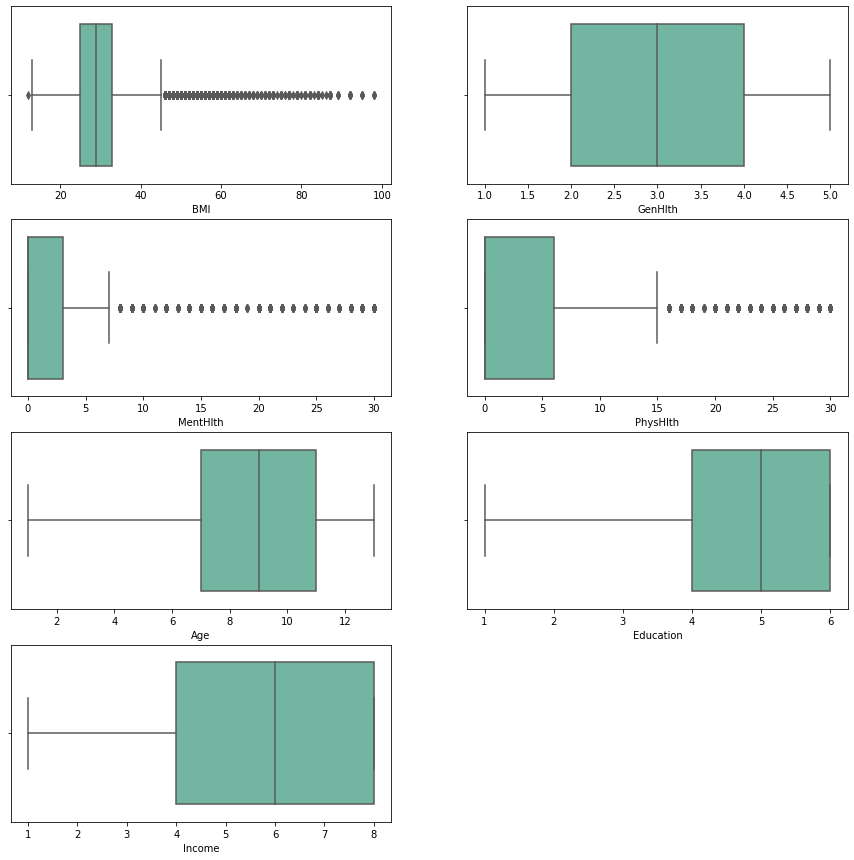

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

##2.5 Finding corelation between features

Text(0.5, 1.0, 'correlation of feature')

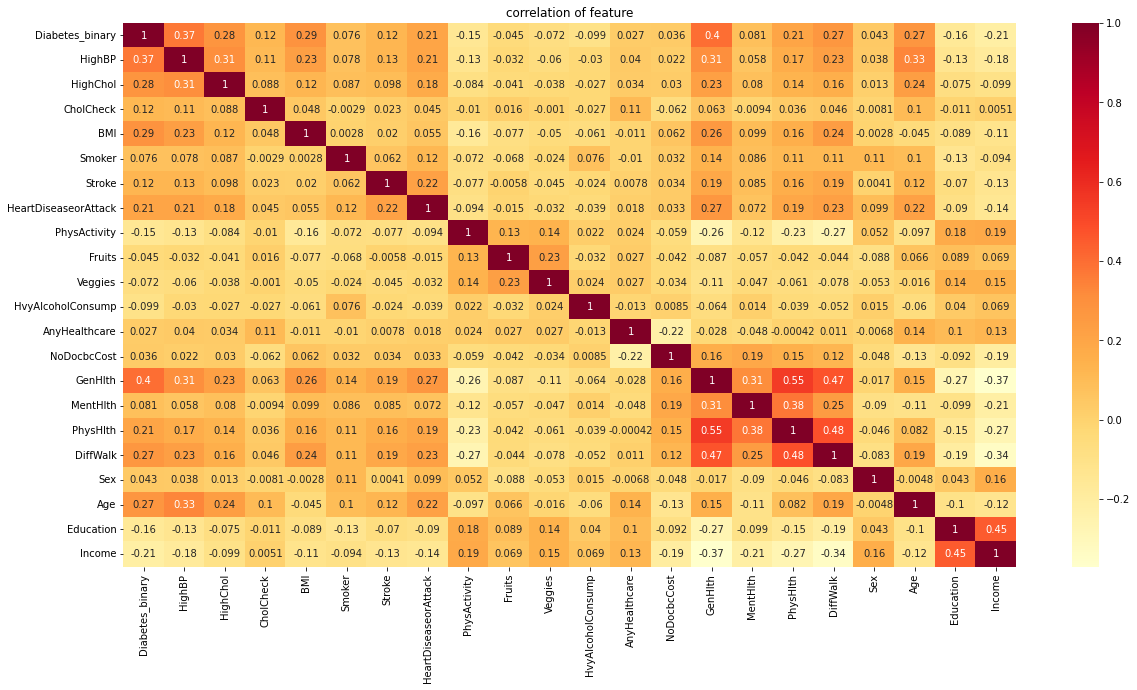

In [ ]:
#using heatmap to understand correlation better in dataset df1
#Heatmap of correlation
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

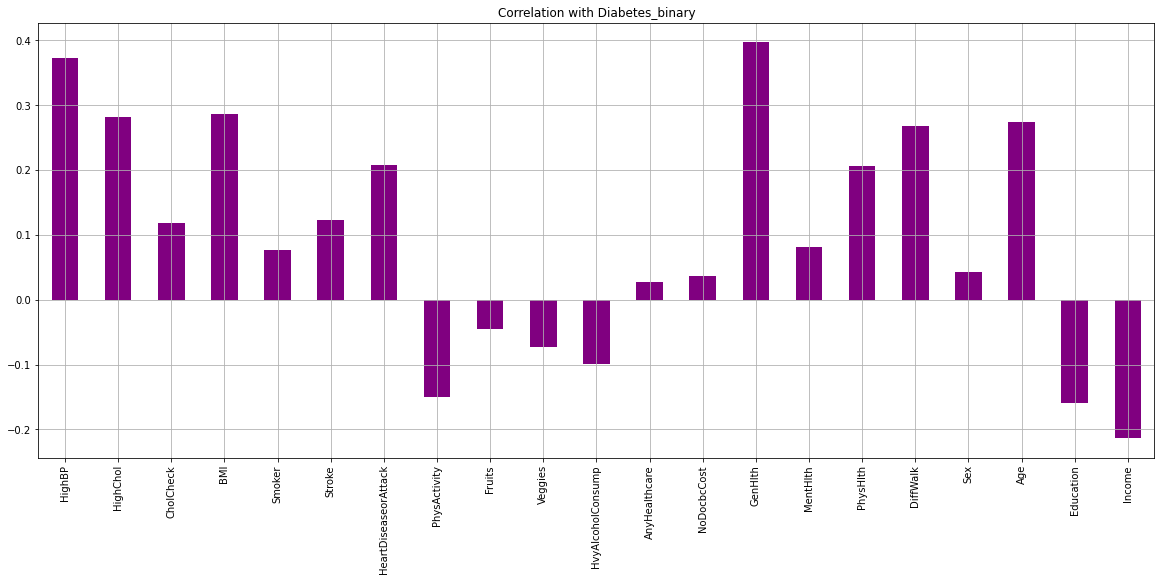

In [ ]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple");

##2.6 Droping features have low correlation with "Diabetes_binary"

In [ ]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" ]
df.drop(colomns , axis= 1 ,inplace=True)

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age',
       'Education', 'Income'],
      dtype='object')

# Data Splitting and scaling

In [ ]:
X = df.drop(["Diabetes_binary"], axis= 1)
y = df["Diabetes_binary"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69057 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                69057 non-null  float64
 1   HighChol              69057 non-null  float64
 2   BMI                   69057 non-null  float64
 3   Smoker                69057 non-null  float64
 4   Stroke                69057 non-null  float64
 5   HeartDiseaseorAttack  69057 non-null  float64
 6   PhysActivity          69057 non-null  float64
 7   HvyAlcoholConsump     69057 non-null  float64
 8   NoDocbcCost           69057 non-null  float64
 9   GenHlth               69057 non-null  float64
 10  MentHlth              69057 non-null  float64
 11  PhysHlth              69057 non-null  float64
 12  DiffWalk              69057 non-null  float64
 13  Age                   69057 non-null  float64
 14  Education             69057 non-null  float64
 15  Income             

In [ ]:
y.value_counts()

1.0    35097
0.0    33960
Name: Diabetes_binary, dtype: int64

## Spliting using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,y, test_size=0.3 , random_state=42, shuffle = True)

# Modeling

## Using default model

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initializing the model
model = LogisticRegression()

# fitting the model on the train data
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_test.shape

(20718, 16)

In [ ]:
Y_test.shape

(20718,)

In [ ]:
from sklearn.metrics import f1_score

y_pred=model.predict(X_test)

print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

acc_default = model.score(X_test, Y_test)
f1_default = f1_score(Y_test,y_pred)
print('Test set score: {:.4f}'.format(acc_default))

print('Test set f1__score: {:.4f}'.format(f1_default))

Training set score: 0.7391
Test set score: 0.7449
Test set f1__score: 0.7552


In [ ]:
from sklearn.metrics import mean_squared_error
import math
#check MSE & RMSE
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.25509219036586545
Root Mean Squared Error : 0.5050665207335222


In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10120
         1.0       0.74      0.77      0.76     10598

    accuracy                           0.74     20718
   macro avg       0.75      0.74      0.74     20718
weighted avg       0.75      0.74      0.74     20718



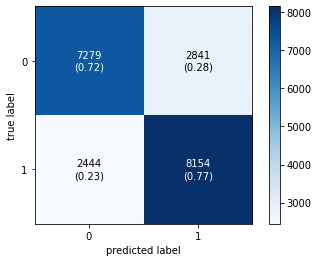

In [ ]:
# calculating and plotting the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Using tuning hyperparameter model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky', 'sag', 'saga']
penalty = ['l1', 'l2', 'elasticnet', None]
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                    'newton-cholesky', 'sag', 'saga']})

In [ ]:
print('The best hyper parameters are: \n',grid_search.best_params_)

The best hyper parameters are: 
 {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
grid_search.best_score_

0.7405198359830002

In [ ]:
model = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'lbfgs')
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [ ]:
y_pred=model.predict(X_test)

print('Training set score: {:.4f}'.format(model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, Y_test)))

print('Test set f1__score: {:.4f}'.format(f1_score(Y_test, y_pred)))

Training set score: 0.7388
Test set score: 0.7449
Test set f1__score: 0.7546


In [ ]:
from sklearn.metrics import mean_squared_error
import math
#check MSE & RMSE
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.25509219036586545
Root Mean Squared Error : 0.5050665207335222


In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10120
         1.0       0.74      0.77      0.75     10598

    accuracy                           0.74     20718
   macro avg       0.75      0.74      0.74     20718
weighted avg       0.74      0.74      0.74     20718



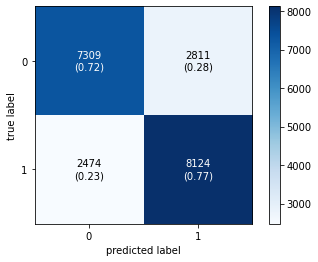

In [ ]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Compare default and hyperparameter models

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X_label = ['Default paras', 'Optimal paras']
acc = np.round(acc_default, 2)
acc_gs = np.round(acc, 2)


f1 = np.round(f1_default, 2)
f1_gs= np.round(f1_gs, 2)
acc_ = [acc, acc_gs]
f1_ = [f1,f1_gs]
X_axis = np.arange(len(X_label))
r = np.arange(len(acc_))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(X_axis - width/2, acc_, width, label='Accuracy',)
rects2 = ax.bar(X_axis + width/2, f1_, width, label='F1 Score')
plt.xticks(X_axis, X_label)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Train test split: Compare 2 Naive Bayes models with default and optimal parameters")
plt.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.ylim(top = max(f1,f1_gs,acc,acc_gs)*1.4)
plt.show()

NameError: ignored

# Kfold spliting

## Tham số mặc định

In [ ]:
from sklearn.model_selection import KFold
model = LogisticRegression()
acc_score = pd.DataFrame(columns = ['Score','F1-score'])
kf = KFold(n_splits=5,shuffle=True)
for train_index , test_index in kf.split(X,y):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    Y_train , Y_test = y.iloc[train_index] , y.iloc[test_index]
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, Y_test)
    f = f1_score(Y_test, y_pred)
    acc_score.loc[len(acc_score.index)] = [score,f]


print('Accuracy with KFold = 5')
print('F1-score trung bình: {:.4f}'.format(acc_score['F1-score'].mean()))
print('Score trung bình: {:.4f}'.format(acc_score['Score'].mean()))
acc_score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy with KFold = 5
F1-score trung bình: 0.7502
Score trung bình: 0.7414


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Score,F1-score
0,0.740153,0.750608
1,0.744280,0.752384
2,0.740135,0.749109
3,0.740135,0.748546
4,0.742234,0.750140


## Tune tham số

In [ ]:
from sklearn.model_selection import KFold
model = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'lbfgs')
acc_score = pd.DataFrame(columns = ['Score','F1-score'])
kf = KFold(n_splits=5,shuffle=True)
for train_index , test_index in kf.split(X,y):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    Y_train , Y_test = y.iloc[train_index] , y.iloc[test_index]
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_train, Y_train)
    f = f1_score(Y_test, y_pred)
    acc_score.loc[len(acc_score.index)] = [score,f]


print('Accuracy with KFold = 5')
print('F1-score trung bình: {:.4f}'.format(acc_score['F1-score'].mean()))
print('Score trung bình: {:.4f}'.format(acc_score['Score'].mean()))
acc_score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy with KFold = 5
F1-score trung bình: 0.7514
Score trung bình: 0.7415


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Score,F1-score
0,0.739850,0.755022
1,0.742909,0.748360
2,0.739800,0.756610
3,0.742570,0.750797
4,0.742135,0.746223


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)